In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from pymystem3 import Mystem
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# dataset = pd.read_csv("LawReportsDB - Лист1.csv", delimiter = "\c", quoting = 3)
dataset = pd.read_csv("LawReportsDB.csv")

In [89]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
dataset.head(10)

,Report,value
0,Исковое заявление ГУ «Зор–Октябрьская основная...,1
1,Исковое заявление АО «Казахтелеком» Южно-Казах...,1
2,Иск Южно-Казахстанской областной дирекции теле...,1
3,Иск акционерного общества «Энергоцентр» к госу...,1
4,Заявление Государственного учреждения «Налогов...,1
5,Исковые требования Государственного учреждения...,1
6,Исковые требования Государственного учреждения...,1
7,Исковое заявление АО «БТА Банк» к индивидуальн...,1
8,Исковые требования Товарищества с ограниченной...,1
9,Исковые требования Потребительского кооператив...,1


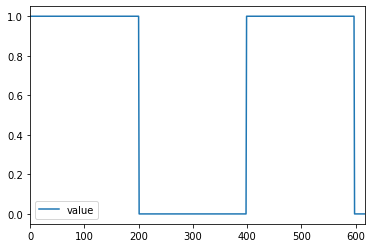

In [15]:
dataset.plot(y=["value"])
plt.show()

In [16]:
corpus = []
for i in range(0, 618):
    report = re.sub("[^А-я]", " ", str(dataset["Report"][i]))
#     report = Mystem.lemmatize(str(dataset["Report"][i]).lower())
    report = report.lower()
    report = report.split()
    ps = PorterStemmer()
    report = [ps.stem(word) for word in report if not word in set(stopwords.words("russian"))]
    report = " ".join(report)
    corpus.append(report)

In [17]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [20]:
NB_Prediction = classifier.predict(X_test)
NB_Prediction

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
NB_Test = confusion_matrix(y_test, NB_Prediction) 
NB_Test

array([[28, 11],
       [ 5, 80]], dtype=int64)

In [24]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [25]:
DT_Prediction = classifier.predict(X_test)
DT_Prediction

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [26]:
DT_Test = confusion_matrix(y_test, DT_Prediction)
DT_Test

array([[38,  1],
       [ 0, 85]], dtype=int64)

In [27]:
classifier = RandomForestClassifier(n_estimators = 300, criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [28]:
RF_Prediction = classifier.predict(X_test)
RF_Prediction

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [29]:
RF_Test = confusion_matrix(y_test, RF_Prediction)
RF_Test

array([[38,  1],
       [ 0, 85]], dtype=int64)